Цель: изучить применение методов оптимизации для решения задачи классификации
Описание задания:
В домашнем задании необходимо применить полученные знания в теории оптимизации и машинном обучении для реализации логистической регрессии.
Этапы работы:**

Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.
Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.
Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.

Результат: получены навыки реализации методов оптимизации в задаче бинарной классификации. Пройденные методы оптимизации используются и в нейросетях.

In [1]:
"""https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/"""

'https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/'

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 80

In [3]:
iris = load_iris(as_frame=True)

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [6]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.frame)
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [7]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Т.к. нам необходимы только Iris Versicolor, Iris Virginica, удаляем Iris Setosa, так же оставим только два критерия 'petal length (cm)','petal width (cm)' 

In [8]:
iris_df = data.loc[data['target']!=0]
y = iris_df['target']
iris_df = iris_df.drop(columns=['sepal length (cm)', 'sepal width (cm)', 'target'])
# iris_df = iris_df.drop(columns=['petal length (cm)', 'petal width (cm)', 'target'])

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  100 non-null    float64
 1   petal width (cm)   100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [10]:
X = iris_df.to_numpy(copy=True)
y = y.to_numpy(copy=True)

In [11]:
display(X, y)

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5],
       [4.5, 1.3],
       [4.7, 1.6],
       [3.3, 1. ],
       [4.6, 1.3],
       [3.9, 1.4],
       [3.5, 1. ],
       [4.2, 1.5],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3],
       [4.4, 1.4],
       [4.5, 1.5],
       [4.1, 1. ],
       [4.5, 1.5],
       [3.9, 1.1],
       [4.8, 1.8],
       [4. , 1.3],
       [4.9, 1.5],
       [4.7, 1.2],
       [4.3, 1.3],
       [4.4, 1.4],
       [4.8, 1.4],
       [5. , 1.7],
       [4.5, 1.5],
       [3.5, 1. ],
       [3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4. , 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [3.3, 1. ],
       [4.2, 1.3],
       [4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9,

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
y[y==1] = 0
y[y==2] = 1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
X

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5],
       [4.5, 1.3],
       [4.7, 1.6],
       [3.3, 1. ],
       [4.6, 1.3],
       [3.9, 1.4],
       [3.5, 1. ],
       [4.2, 1.5],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3],
       [4.4, 1.4],
       [4.5, 1.5],
       [4.1, 1. ],
       [4.5, 1.5],
       [3.9, 1.1],
       [4.8, 1.8],
       [4. , 1.3],
       [4.9, 1.5],
       [4.7, 1.2],
       [4.3, 1.3],
       [4.4, 1.4],
       [4.8, 1.4],
       [5. , 1.7],
       [4.5, 1.5],
       [3.5, 1. ],
       [3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4. , 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [3.3, 1. ],
       [4.2, 1.3],
       [4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9,

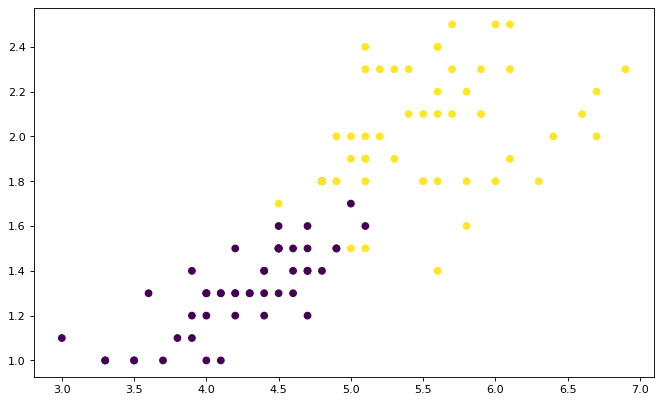

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y)

Реализация линейной регрессии

In [15]:
X = np.c_[np.ones(len(X)), X]
X

array([[1. , 4.7, 1.4],
       [1. , 4.5, 1.5],
       [1. , 4.9, 1.5],
       [1. , 4. , 1.3],
       [1. , 4.6, 1.5],
       [1. , 4.5, 1.3],
       [1. , 4.7, 1.6],
       [1. , 3.3, 1. ],
       [1. , 4.6, 1.3],
       [1. , 3.9, 1.4],
       [1. , 3.5, 1. ],
       [1. , 4.2, 1.5],
       [1. , 4. , 1. ],
       [1. , 4.7, 1.4],
       [1. , 3.6, 1.3],
       [1. , 4.4, 1.4],
       [1. , 4.5, 1.5],
       [1. , 4.1, 1. ],
       [1. , 4.5, 1.5],
       [1. , 3.9, 1.1],
       [1. , 4.8, 1.8],
       [1. , 4. , 1.3],
       [1. , 4.9, 1.5],
       [1. , 4.7, 1.2],
       [1. , 4.3, 1.3],
       [1. , 4.4, 1.4],
       [1. , 4.8, 1.4],
       [1. , 5. , 1.7],
       [1. , 4.5, 1.5],
       [1. , 3.5, 1. ],
       [1. , 3.8, 1.1],
       [1. , 3.7, 1. ],
       [1. , 3.9, 1.2],
       [1. , 5.1, 1.6],
       [1. , 4.5, 1.5],
       [1. , 4.5, 1.6],
       [1. , 4.7, 1.5],
       [1. , 4.4, 1.3],
       [1. , 4.1, 1.3],
       [1. , 4. , 1.3],
       [1. , 4.4, 1.2],
       [1. , 4.6

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y==1] + 1e-30))
    logloss_0 = np.sum(np.log(1-y_proba[y==0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total

def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad


In [17]:
def visualize(W):
    x_t_ones = np.c_[np.ones(x_t.shape[0]), x_t]
    
    y_proba = sigmoid(x_t_ones @ W)

    Z = np.where(y_proba >= 0.5, 1, 0)
    Z = Z.reshape(xx.shape)
       
    plt.figure(1, figsize=(6,6))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(X[y==0][:, 1], X[y==0][:, 2], edgecolors='k')
    plt.scatter(X[y==1][:, 1], X[y==1][:, 2], edgecolors='k')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()   

In [18]:
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5

h = .02
xx, yy = np.meshgrid( np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_t = np.c_[xx.ravel(), yy.ravel()]

Итерация 0
Logloss 0.9530888687572902
Accurancy 0.5
____________________________________________


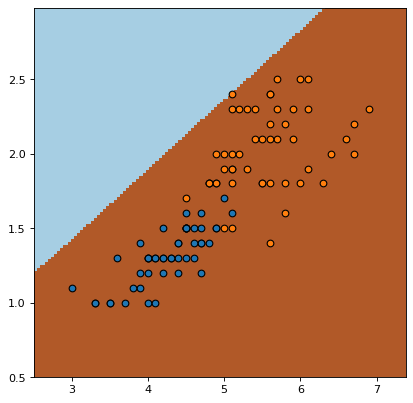

Итерация 90
Logloss 34.5387382962799
Accurancy 0.5
____________________________________________


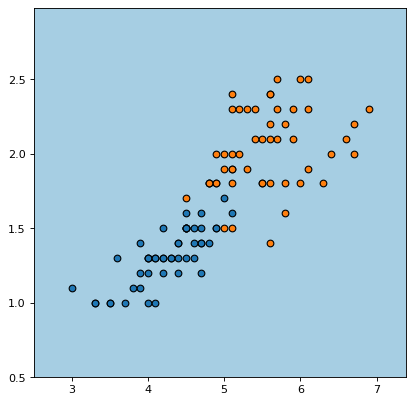

Итерация 180
Logloss 34.538776394910684
Accurancy 0.5
____________________________________________


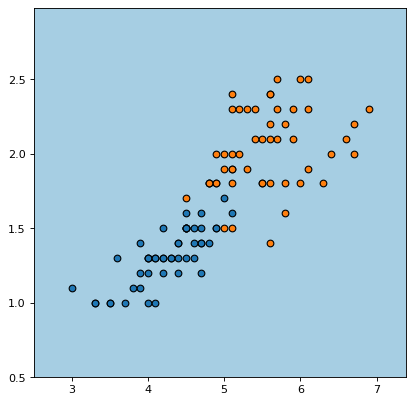

In [19]:
#установка минимального значения, но которое должны изменяться веса
eps = 0.0001

#первоначальная точка
np.random.seed(8)
W = np.random.randn(X.shape[1])

#размер шага (learning rate)
learning_rate = 0.001

next_W = W

#количество итераций
n = 260
for i in range(n):
    cur_W = next_W

    #движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)
    #остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break
    
    if i % 90 == 0:
        print(f'Итерация {i}')
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f'Logloss {logloss(y, y_proba)}')
        print(f'Accurancy {accuracy}')
        print(f'____________________________________________')
            
        visualize(next_W)
        
        

In [20]:
y_proba = sigmoid(X @ next_W)
y_proba[y==1]

array([4.38795290e-126, 1.52478643e-106, 7.48614428e-122, 1.01424105e-114,
       1.03534380e-120, 3.63777359e-134, 9.41974449e-095, 4.92854420e-127,
       3.07624174e-118, 7.64190432e-128, 3.67261201e-107, 4.62475038e-110,
       8.13766181e-115, 2.10880009e-105, 1.23605893e-109, 1.55651182e-112,
       5.82373418e-113, 1.52595363e-136, 1.11477352e-140, 2.60138873e-102,
       1.43189436e-119, 1.21086513e-103, 2.63032416e-135, 2.08719829e-102,
       2.46819186e-118, 9.33038874e-122, 1.19846145e-100, 2.08719829e-102,
       1.41722654e-116, 5.30259427e-117, 3.91386110e-124, 4.97955297e-130,
       3.41354245e-117, 4.53048706e-104, 3.01354068e-112, 1.31725402e-126,
       1.98032910e-118, 5.82373418e-113, 1.19846145e-100, 4.67261499e-113,
       1.98032910e-118, 5.13184043e-109, 1.52478643e-106, 4.34300426e-123,
       8.30697761e-121, 8.93743266e-111, 8.75526670e-105, 6.39609181e-109,
       2.71076619e-114, 6.33057251e-106])

In [21]:
logloss_0 = np.sum(np.log(1 - y_proba[y==0] + 1e-30))

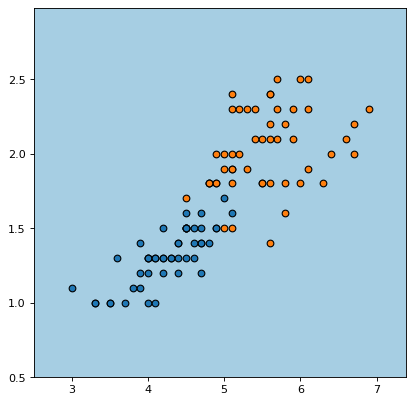

In [22]:
visualize(next_W)

In [23]:
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [24]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [27]:
model.score(X_test,y_test)

0.9

In [28]:
X_train

array([[1. , 4.2, 1.5],
       [1. , 4.3, 1.3],
       [1. , 6.1, 2.3],
       [1. , 4.5, 1.5],
       [1. , 5.9, 2.3],
       [1. , 4.5, 1.3],
       [1. , 5.5, 1.8],
       [1. , 5.3, 2.3],
       [1. , 4.5, 1.6],
       [1. , 4.5, 1.5],
       [1. , 4.1, 1.3],
       [1. , 4.5, 1.5],
       [1. , 3.3, 1. ],
       [1. , 5.2, 2.3],
       [1. , 5. , 1.7],
       [1. , 3.9, 1.1],
       [1. , 6.4, 2. ],
       [1. , 4.4, 1.4],
       [1. , 5.5, 2.1],
       [1. , 4.7, 1.4],
       [1. , 4.3, 1.3],
       [1. , 4. , 1.3],
       [1. , 4.1, 1. ],
       [1. , 4.1, 1.3],
       [1. , 4.6, 1.3],
       [1. , 5.6, 2.1],
       [1. , 4.7, 1.6],
       [1. , 5.1, 2.4],
       [1. , 4.7, 1.5],
       [1. , 5.4, 2.1],
       [1. , 4.5, 1.7],
       [1. , 5.1, 1.8],
       [1. , 5.8, 2.2],
       [1. , 3.3, 1. ],
       [1. , 6. , 2.5],
       [1. , 6.7, 2.2],
       [1. , 4.2, 1.3],
       [1. , 6.9, 2.3],
       [1. , 5.3, 1.9],
       [1. , 5.2, 2. ],
       [1. , 5.8, 1.6],
       [1. , 4.6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


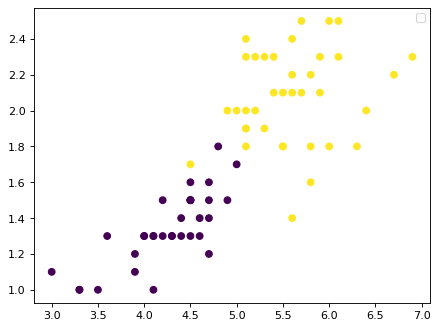

In [29]:
plt.scatter(x=X_train[:, 1], y=X_train[:, 2], c=y_train)
plt.legend()
plt.show()

Метод градиентного спуска

In [30]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += (pred - y[i]) ** 2
    return total_cost / len(X)

def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i])
    return total_cost / len(X)    

def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i]) * X[i]
    return total_cost / (len(X))

In [31]:
EPOCHS = 100
LEARNING_RATE = 0.0001

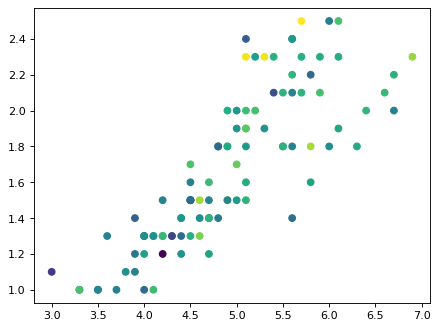

In [32]:
N = 100
Y =  X[:, 1]+ 2*X[:, 2] + 1 + np.random.normal(scale=5, size=N)

plt.scatter(x=X[:, 1], y=X[:, 2], c=Y)
plt.show()

In [33]:
theta0 = 1
theta1 = 1
N = 100
# Y =  2*X[:, 1]+ 3*X[:, 2] + 1 + np.random.normal(scale=5, size=N)
Y =  3*X[:, 0] + X[:, 1]+ 2*X[:, 2] + 1 + np.random.normal(scale=5, size=N)
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, y, theta0, theta1))

t0: [1.00201025 1.00122905 1.00187505] t1: [1.00201025 1.00624854 1.00327328] cost: [ 2.51207764 29.85377274  4.84571521]
t0: [1.00401969 1.00245172 1.00374862] t1: [1.00401969 1.01246494 1.00654399] cost: [ 2.52418276 30.20421421  4.87791716]
t0: [1.00602833 1.00366804 1.00562072] t1: [1.00602833 1.01864939 1.0098121 ] cost: [ 2.53631532 30.55490181  4.91020561]
t0: [1.00803616 1.00487805 1.00749136] t1: [1.00803616 1.02480204 1.01307764] cost: [ 2.54847528 30.90581324  4.94258032]
t0: [1.01004319 1.00608179 1.00936052] t1: [1.01004319 1.03092305 1.0163406 ] cost: [ 2.56066262 31.25692655  4.97504104]
t0: [1.01204942 1.00727928 1.01122822] t1: [1.01204942 1.03701259 1.01960098] cost: [ 2.57287728 31.6082201   5.00758752]
t0: [1.01405485 1.00847055 1.01309445] t1: [1.01405485 1.04307082 1.02285879] cost: [ 2.58511924 31.9596726   5.04021954]
t0: [1.01605947 1.00965564 1.01495921] t1: [1.01605947 1.0490979  1.02611403] cost: [ 2.59738846 32.31126306  5.07293683]
t0: [1.01806329 1.010834

In [34]:
cost_function(X,Y,10,10)

array([  97.29180684, 2276.03077387,  251.6759359 ])

In [35]:
EPOCHS = 250
LEARNING_RATE = 0.0001
costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(X.shape[0],X.shape[1]))
# print(params)

list_params_gd = []
for _ in range(EPOCHS):
    predictions = params[:, 0] * X[:, 0] + params[:, 1] * X[:, 1] + params[:, 2] * X[:, 2]
    preds.append(predictions)

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) * (2/len(predictions))
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X[:, 1]) * (2/len(predictions))    
    params[2] -= LEARNING_RATE * np.sum((predictions - Y) * X[:, 2]) * (2/len(predictions)) 
    
    list_params_gd.append(params.copy())

In [36]:
costs[-1]

184.64330266354227

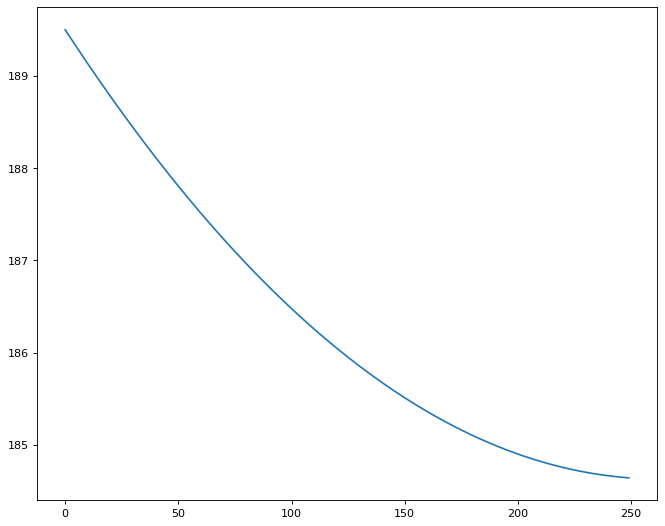

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(costs)
plt.show()

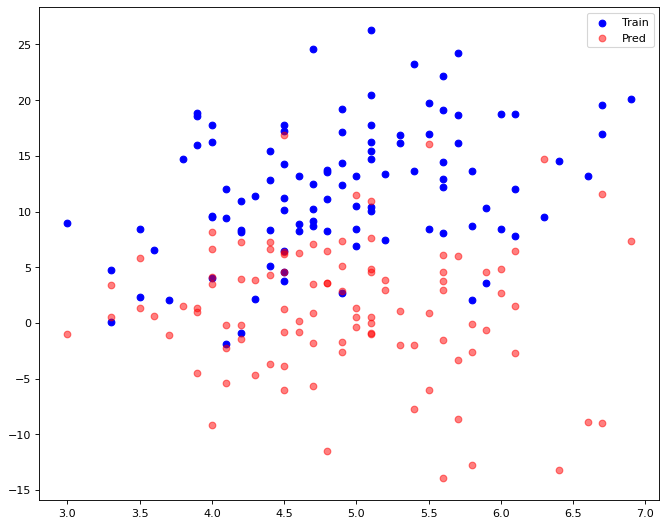

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], Y, color='blue', label='Train')
plt.scatter(X[:,1], preds[-1], color='red', label='Pred', alpha=0.5)
plt.legend()
plt.show()

In [39]:
params

array([[ 5.45439193e-01,  2.54786569e-01, -5.71735664e-01],
       [ 2.75871436e+00,  2.39323566e+00,  2.29046176e+00],
       [-5.51459541e-01,  4.74999657e-01,  7.25191059e-01],
       [-6.47947460e-01,  6.35891080e-01,  1.74011731e+00],
       [ 2.96682218e-01,  7.07503662e-01,  1.82281576e+00],
       [ 4.30769029e-01,  1.54272963e+00, -9.00721171e-01],
       [-1.37125010e-01,  1.29757901e+00,  6.75271167e-01],
       [ 3.19581170e-02,  9.18145896e-01,  3.80509466e-01],
       [ 5.16367487e-01, -3.55239458e-01,  2.08777001e-01],
       [ 3.28411076e-01, -4.98224766e-01, -2.09177677e+00],
       [-8.25877406e-02,  2.45518265e+00, -2.67211000e+00],
       [-9.13279281e-01, -2.27314357e-01,  2.69315377e-01],
       [ 1.13046126e+00,  1.04239745e+00,  1.30381044e+00],
       [ 1.38940073e+00, -6.56452578e-01, -5.62572959e-02],
       [-4.99902620e-01,  4.36419381e-01, -3.75813047e-01],
       [-9.23061583e-01,  1.91725024e+00, -1.50302842e-01],
       [-6.38729756e-01,  8.24770331e-01